In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
dg = pd.read_csv("HeartDisease.csv")

In [6]:
dg.head(3)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [8]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
dg.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [12]:
dg.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
dg.nunique()

age                     41
gender                   2
chest_pain               4
rest_bps                49
cholestrol             152
fasting_blood_sugar      2
rest_ecg                 3
thalach                 91
exer_angina              2
old_peak                40
slope                    3
ca                       5
thalassemia              4
target                   2
dtype: int64

In [23]:
dg.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [24]:
##   Check the spread of the features :-
l=list(dg.columns)
l[0:len(l)-2]

['age',
 'gender',
 'chest_pain',
 'rest_bps',
 'cholestrol',
 'fasting_blood_sugar',
 'rest_ecg',
 'thalach',
 'exer_angina',
 'old_peak',
 'slope',
 'ca']

In [25]:
##  Run a 'for' loop to draw boxlots of all the features for '0' and '1' TARGET CLASS  :

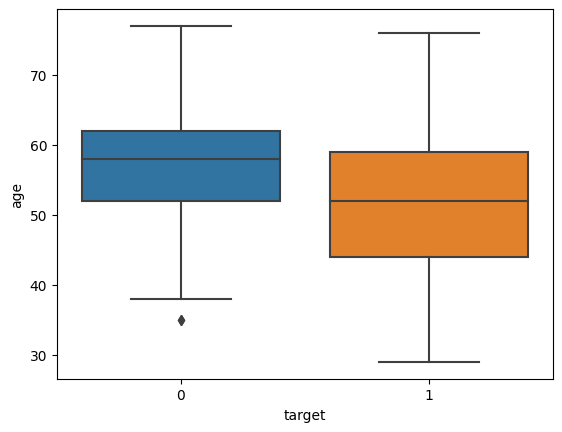

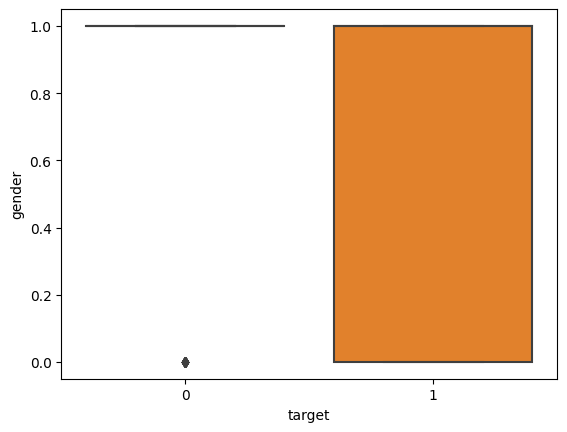

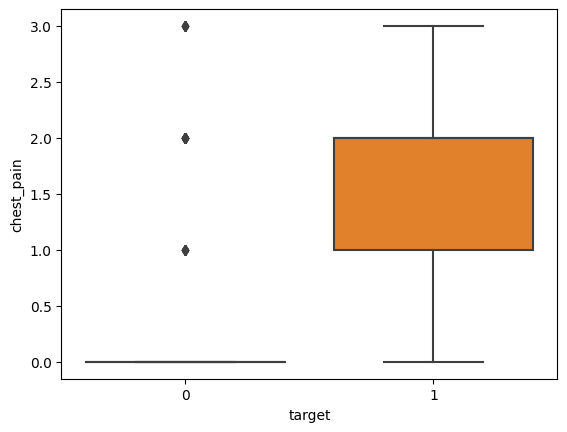

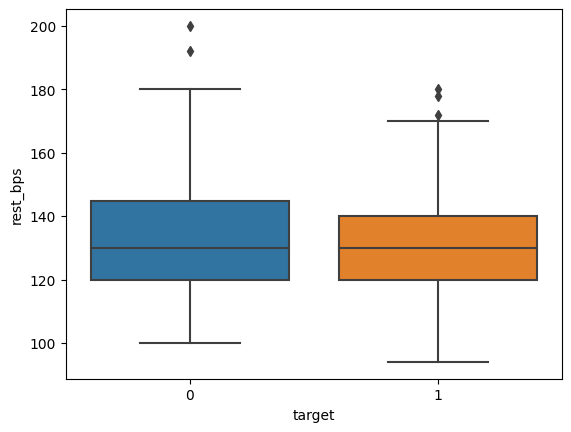

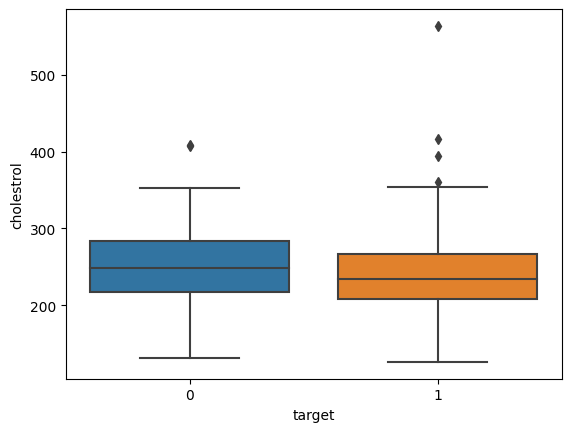

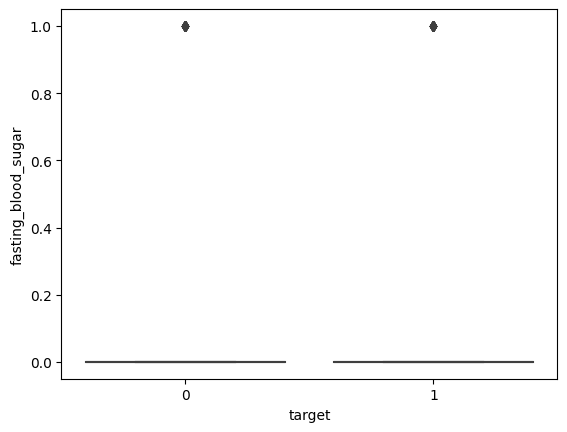

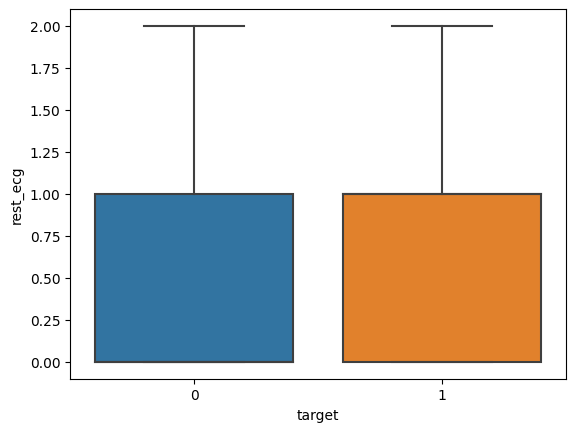

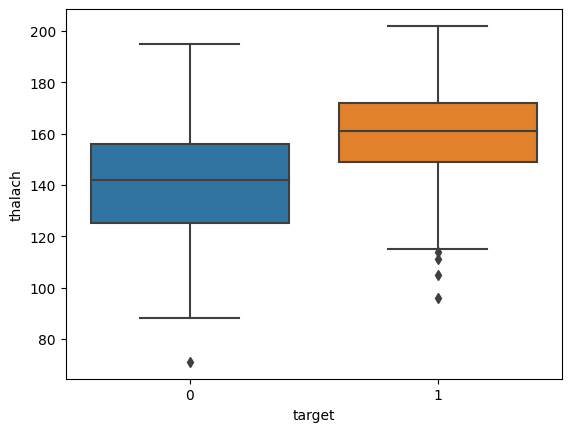

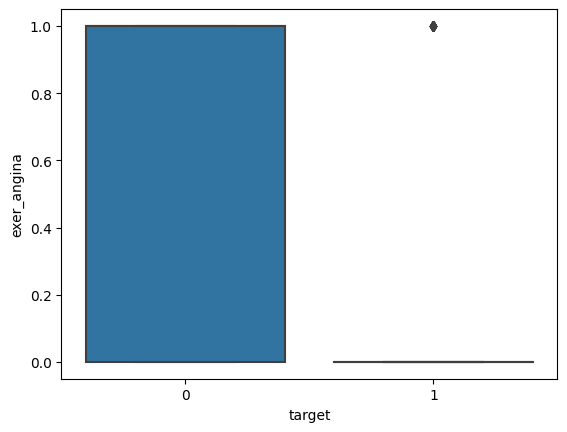

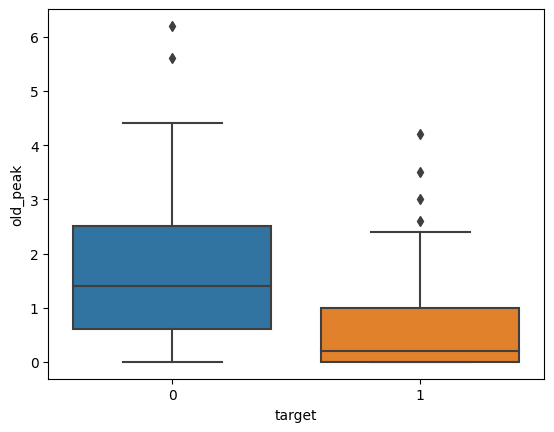

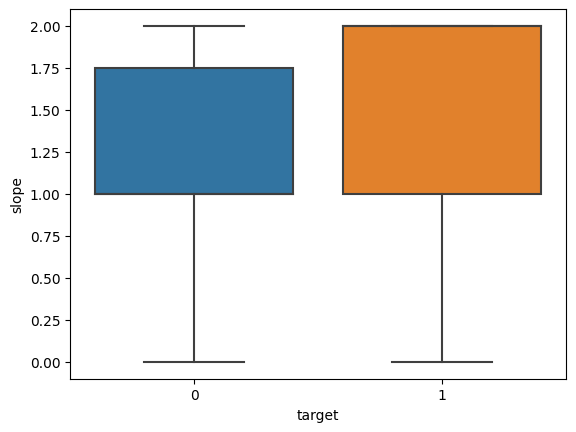

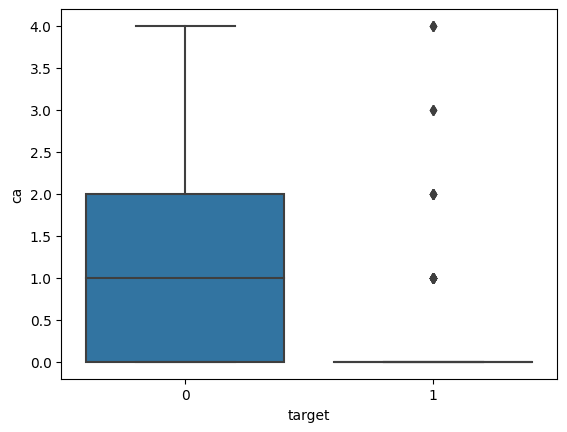

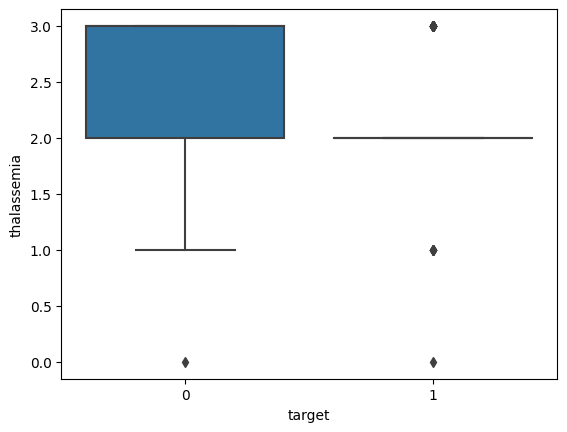

<Figure size 640x480 with 0 Axes>

In [26]:
for i in range(len(l)-1):
    sns.boxplot(x='target',y=l[i], data=dg)
    plt.figure()

## Scale the features using sklearn.preprocessing package :-

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
###  Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform :-

In [36]:
dg.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [37]:
scaler.fit(dg.drop("target", axis = 1))
scaled_features = scaler.transform(dg.drop("target", axis  = 1))

In [38]:
dg_feat = pd.DataFrame(scaled_features,columns=dg.columns[:-1])
dg_feat.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [39]:
dg_feat.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-1.407015e-16,2.345026e-17,-7.035077e-16,-1.113887e-16,-2.345026e-17,1.465641e-16,-6.800574e-16,-4.690051e-17,2.345026e-17,-1.407015e-16,-2.345026e-17,-1.641518e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


### Determining the  label parts ❎

In [42]:
x = dg_feat
y = dg['target']

In [43]:
x

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [44]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Train Test Split :-

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [47]:
 x_train

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
74,-1.253580,-1.468418,1.002577,-0.549641,-0.642843,-0.417635,0.898962,0.671400,-0.696631,-0.724323,-0.649113,-0.714429,-0.512922
153,1.283063,-1.468418,1.002577,0.821069,0.613313,-0.417635,-1.005832,0.102904,-0.696631,-0.896862,-0.649113,0.265082,-0.512922
64,0.400752,0.681005,1.002577,0.478391,-0.681494,2.394438,-1.005832,0.671400,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
296,0.952197,-1.468418,-0.938515,-0.435415,-0.952051,-0.417635,0.898962,-0.596784,1.435481,-0.896862,-0.649113,-0.714429,-0.512922
287,0.290464,0.681005,0.032031,1.277972,-0.275659,-0.417635,-1.005832,0.627670,-0.696631,-0.896862,0.976352,0.265082,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-1.253580,0.681005,-0.938515,0.021488,0.014223,2.394438,-1.005832,-0.290671,1.435481,-0.810592,-0.649113,3.203615,1.123029
192,-0.040403,0.681005,-0.938515,-0.663867,-1.125980,-0.417635,0.898962,-1.602586,-0.696631,0.310912,-0.649113,0.265082,1.123029
117,0.180175,0.681005,1.973123,-0.663867,-1.029353,-0.417635,-1.005832,0.540209,-0.696631,0.742260,-0.649113,-0.714429,1.123029
47,-0.812425,0.681005,1.002577,0.364165,0.207478,-0.417635,-1.005832,0.277826,-0.696631,-0.896862,0.976352,-0.714429,-0.512922


In [48]:
x_test

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
225,1.724218,0.681005,-0.938515,0.763956,-1.396537,-0.417635,0.898962,-1.077820,1.435481,1.346147,-2.274579,-0.714429,1.123029
152,1.062485,0.681005,1.973123,2.191778,-0.372287,-0.417635,-1.005832,0.234095,-0.696631,-0.379244,-0.649113,-0.714429,1.123029
228,0.511041,0.681005,1.973123,2.191778,0.806568,-0.417635,-1.005832,0.409017,-0.696631,-0.724323,-0.649113,-0.714429,1.123029
201,0.621330,0.681005,-0.938515,-0.378302,0.226803,-0.417635,-1.005832,-0.378132,1.435481,1.518686,-0.649113,0.265082,1.123029
52,0.841908,0.681005,1.002577,-0.092738,-0.294985,-0.417635,0.898962,-0.159479,-0.696631,0.655990,-0.649113,2.224104,1.123029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-1.143291,-1.468418,1.002577,-0.778093,-0.082404,-0.417635,0.898962,-0.028288,-0.696631,-0.638053,-0.649113,0.265082,-0.512922
302,0.290464,-1.468418,0.032031,-0.092738,-0.198357,-0.417635,-1.005832,1.064975,-0.696631,-0.896862,-0.649113,0.265082,-0.512922
26,0.511041,0.681005,1.002577,1.049520,-0.662169,2.394438,0.898962,0.321556,-0.696631,0.483451,0.976352,-0.714429,-0.512922
108,-0.481558,-1.468418,0.032031,-0.663867,-0.043753,-0.417635,0.898962,0.540209,-0.696631,0.052103,0.976352,-0.714429,-0.512922


In [49]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [50]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

### Train the Algorithm ❎

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
y_pred = knn.predict(x_test)

In [54]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [55]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

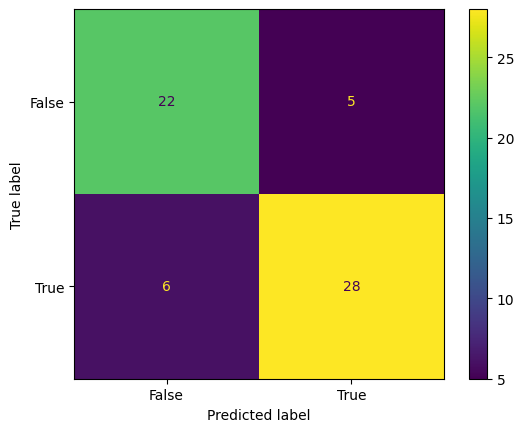

In [56]:
## Evaluating the model :-
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False, True])
confusion_matrix.plot()
plt.show()

In [57]:
### Evaluation of Classification equality :-
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[22  5]
 [ 6 28]]


In [59]:
print(classification_report(y_test,pred))                                                                       ## Important Statements :-

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [60]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.18


In [62]:
 ##  Choosing 'k' by elbow method :-


In [74]:
error_rate = []

# Will take some time
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

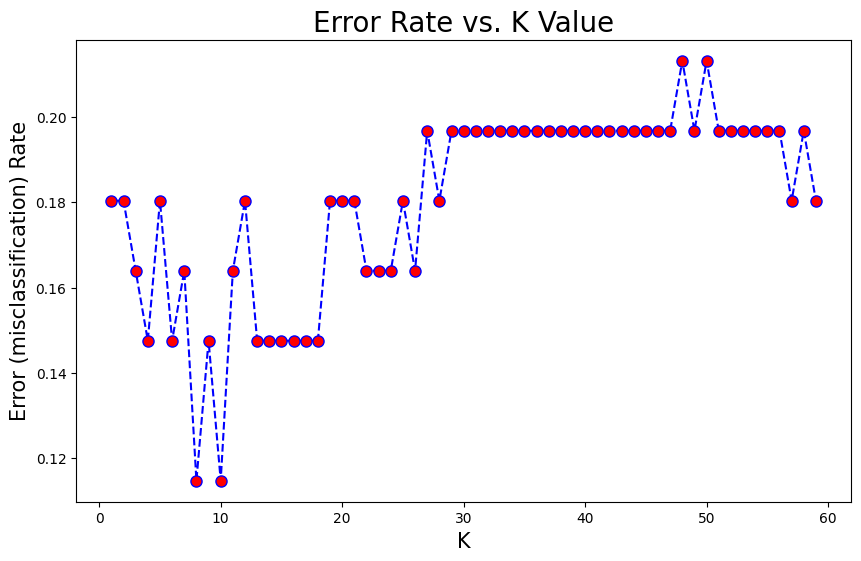

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

In [77]:
## Finding the Accuracy of the model :-

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

81.9672131147541

In [80]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)*100

84.84848484848484